<a href="https://colab.research.google.com/github/RosemaryAnne/gitTest/blob/master/BacterialYield-SustainableFarming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp # sample metadata
!gdown --id 1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ # bacteria counts lognorm


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error

metadata = pd.read_table('sample_metadata.tsv')
metadata.index = ['farm_%i' % i for i in range(len(metadata))]

bacteria_counts_lognorm = pd.read_csv('bacteria_counts_lognorm.csv', index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp
To: /content/sample_metadata.tsv
100% 64.3k/64.3k [00:00<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ
To: /content/bacteria_counts_lognorm.csv
100% 7.44M/7.44M [00:00<00:00, 58.2MB/s]


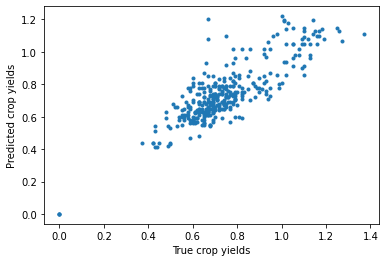

In [ ]:

X = bacteria_counts_lognorm
y = metadata['crop_yield']

X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X, y)

# Initialize model decision tree
decision_tree_regressor = DecisionTreeRegressor(max_depth=1000, max_leaf_nodes=2000)

# Initialize model decision tree
decision_tree_regressor.fit(X_train_dtr, y_train_dtr)

# Make predictions on test data
preds_dtr = decision_tree_regressor.predict(X_test_dtr)

# Plot predictions against the true crop yields of the test data

plt.plot(y_test_dtr, preds_dtr, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

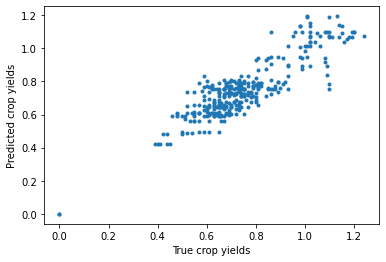

In [ ]:
X = bacteria_counts_lognorm
y = metadata['crop_yield']

# Split data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=200)

model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# Plot predictions against the true crop yields of the test data
plt.plot(y_test, preds, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

In [ ]:
R2 = r2_score(y_test, preds)
print('R2=', R2)

R2= 0.77652252705477


In [ ]:
MAE = mean_absolute_error(y_test, preds) ## FILL IN ###
print('MAE=', MAE)

MAE= 0.06649604963877548


In [ ]:
metadata

,crop_yield,sample_type,country,timestamp
farm_0,0.68,barley soil sample,GAZ:Australia,2011-3-26
farm_1,1.00,barley soil sample,GAZ:Australia,2011-11-22
farm_2,0.87,barley soil sample,GAZ:Australia,2011-6-10
farm_3,0.68,barley soil sample,GAZ:Australia,2011-11-3
farm_4,0.67,barley soil sample,GAZ:Australia,2011-3-26
...,...,...,...,...
farm_1339,0.74,barley soil sample,GAZ:Australia,2011-3-9
farm_1340,0.77,barley soil sample,GAZ:Australia,2011-9-25
farm_1341,0.69,barley soil sample,GAZ:Australia,2011-2-13
farm_1342,0.44,barley soil sample,GAZ:Australia,2011-1-2


In [ ]:
crop_yield_test_predictions = model.predict(X_test)

yield_predictions_dataframe = pd.DataFrame(data={'farm':X_test.index, 'crop_yield':crop_yield_test_predictions})
yield_predictions_dataframe.head()

,farm,crop_yield
0,farm_396,1.132500
1,farm_811,0.810625
2,farm_1004,1.100000
3,farm_1036,0.780000
4,farm_684,0.772727


In [ ]:
sorted_dataframe = yield_predictions_dataframe

top_farms_dataframe = sorted_dataframe.head(50)
farm_names=top_farms_dataframe['farm']
print("According to our model, the top 10 best plots are:", farm_names.to_list())
top_farms_dataframe

According to our model, the top 10 best plots are: ['farm_396', 'farm_811', 'farm_1004', 'farm_1036', 'farm_684', 'farm_989', 'farm_1163', 'farm_362', 'farm_100', 'farm_829', 'farm_343', 'farm_152', 'farm_646', 'farm_1113', 'farm_1207', 'farm_872', 'farm_1214', 'farm_239', 'farm_572', 'farm_172', 'farm_106', 'farm_980', 'farm_1025', 'farm_228', 'farm_658', 'farm_625', 'farm_418', 'farm_138', 'farm_964', 'farm_1319', 'farm_553', 'farm_1199', 'farm_80', 'farm_1006', 'farm_53', 'farm_668', 'farm_741', 'farm_929', 'farm_779', 'farm_299', 'farm_637', 'farm_216', 'farm_120', 'farm_1037', 'farm_1279', 'farm_163', 'farm_443', 'farm_1301', 'farm_321', 'farm_108']


,farm,crop_yield
0,farm_396,1.132500
1,farm_811,0.810625
2,farm_1004,1.100000
3,farm_1036,0.780000
4,farm_684,0.772727
5,farm_989,0.591333
6,farm_1163,0.713333
7,farm_362,1.012500
8,farm_100,0.760000
9,farm_829,0.780000


In [ ]:
crop_yields_top_10_predictions = top_farms_dataframe['crop_yield']


# total crop yield from all 10 farms combined.
total_crop_yield_using_model =  sum(crop_yields_top_10_predictions)
print("total crop yield using model suggestions: ", total_crop_yield_using_model)

total crop yield using model suggestions:  39.742132448433914


In [ ]:
np.random.seed(15) # random set

crop_yields_10_random_picks = np.random.choice(y_test, 10)

total_crop_yield_using_lottery = sum(crop_yields_10_random_picks)
print("Total crop yield using random picks: ", total_crop_yield_using_lottery)

Total crop yield using random picks:  7.74


In [ ]:
total_crop_yield_using_lottery_list = np.array([])
for simulation in range(100):

  crop_yields_10_random_picks = np.random.choice(y_test, 10)
  total_crop_yield_using_lottery = sum(crop_yields_10_random_picks)

  total_crop_yield_using_lottery_list = np.append(total_crop_yield_using_lottery_list, total_crop_yield_using_lottery)

print('lottery crop yields: ', total_crop_yield_using_lottery_list)

lottery crop yields:  [7.59 7.49 7.82 7.25 7.46 8.02 6.77 6.69 7.74 7.29 6.9  6.67 8.49 6.84
 8.02 7.14 7.31 6.93 7.45 7.93 7.2  7.15 6.73 7.16 6.96 7.15 7.02 7.21
 7.32 7.7  6.88 7.63 7.79 7.07 6.35 7.34 7.12 6.79 7.07 7.34 8.4  6.82
 8.29 7.3  7.77 6.19 7.55 7.85 7.4  7.66 8.09 7.25 7.2  7.07 7.23 7.68
 7.34 7.35 8.74 7.51 7.22 6.94 7.9  7.66 6.86 7.98 7.46 7.9  8.05 7.86
 7.1  7.04 7.57 6.97 7.59 8.51 7.71 7.89 8.01 7.52 8.9  7.03 7.54 7.27
 6.45 7.86 8.34 7.22 8.79 7.58 7.75 7.38 8.46 7.45 7.85 7.21 6.7  7.65
 7.03 6.68]


In [ ]:
plt.hist(total_crop_yield_using_lottery_list)
plt.vlines(total_crop_yield_using_model, ymin=0, ymax=30, color='r', linestyle='dashed')
plt.xlabel('Total crop yield')
plt.ylabel('Frequency')
plt.title('Total Crop Yield if picked randomly')
print('Dotted line represents total crop yield if using model to select farms.')